Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("C:/Users/user/Jupyter/IronHack/Work - Python/Week5/Day1/amz_uk_price_prediction_dataset.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [5]:
# Displaying the data types of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64'), dtype('bool')]

In [7]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [9]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [8]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [10]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [24]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()
frequency_table_top_5 = df['category'].value_counts().head(5)
# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)
proportion_table_top_5 = df['category'].value_counts(normalize=True).head(5)

print('Top 5 most listed product category')
print('Frecuency Table')
print(frequency_table_top_5) 
print('\n')
print('Proportion Table')
print(proportion_table_top_5)

Top 5 most listed product category
Frecuency Table
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


Proportion Table
category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64


2. Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

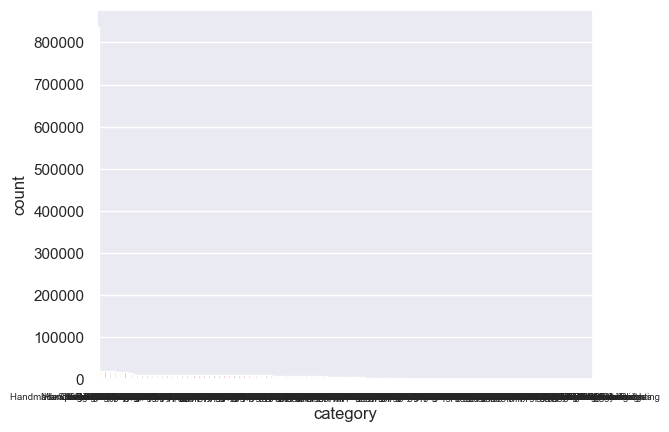

In [88]:
# Plotting a bar chart using the 'count' values from 'frequency_table', with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table, palette="Set3");

<Axes: ylabel='count'>

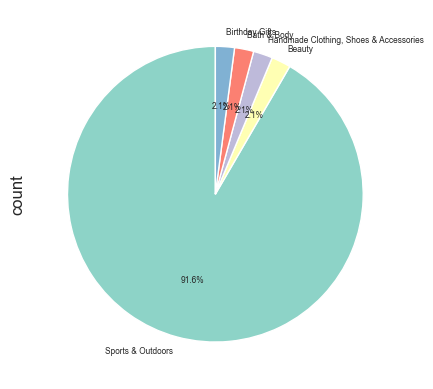

In [38]:
# Plotting a pie chart of the 'frequency_table_top_5' column value counts, with percentage labels, 
frequency_table_top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), fontsize=6)

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [59]:
price_mean = round(df['price'].mean(),2)
price_median = round(df['price'].median(),2)
price_mode = df['price'].mode().iloc[0]


print(f'The average price point of products is: {price_mean} in comparison with the mode price point which is: {price_mode}')

The average price point of products is: 89.24 in comparison with the mode price point which is: 9.99


2. Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [67]:
print(f'variance {df["price"].var()}')
df['price'].describe()


variance 119445.48532256528


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

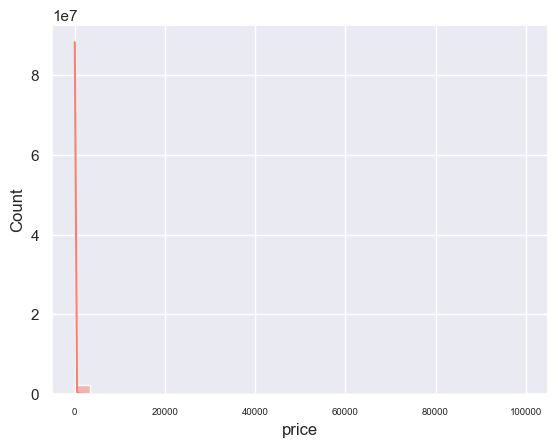

In [68]:
# Plotting price histogram
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

<Axes: >

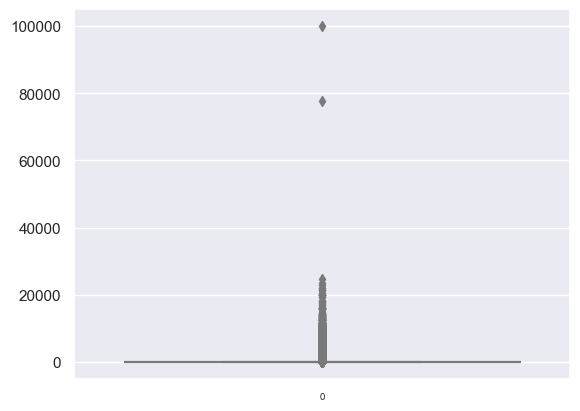

In [69]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue")

Insight: It seems that the prices values contains a big outlier

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [94]:
print(f'The mean is: {round(df["stars"].mean(),2)}')
print(f'The median is: {round(df["stars"].median(),2)}')
print(f'The mode is: {df["stars"].mode().iloc[0]}')

The mean is: 2.15
The median is: 0.0
The mode is: 0.0


Insight: It seems that customers generally don't bother to rate products

2. Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [95]:
print(f'variance {round(df["stars"].var(),2)}')
df['stars'].describe()

variance 4.82


count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

Insight: Review values show a very high standard deviation. There is a wide variation in customer feedback.

3. Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [99]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

print(skewness_stars) 
print(kurtosis_stars)

0.08120735761080985
-1.9260061280432985


Insight: 
Skewness (0.081):
Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
A positive skewness indicates that the right tail of the distribution is longer or fatter than the left tail. Conversely, a negative skewness indicates that the left tail of the distribution is longer or fatter than the right tail.
With a skewness of approximately 0.081, the distribution is slightly right-skewed. This means that there might be a slight tendency for the data to have more extreme values on the right side of the distribution.

Kurtosis (-1.926):
Kurtosis measures the tailedness of the probability distribution of a real-valued random variable. It describes the sharpness of the peak of the distribution and the thickness of the tails relative to a normal distribution.
A negative kurtosis (platykurtic) indicates that the distribution has thinner tails and a flatter peak compared to the normal distribution. Data in such distributions tend to have fewer extreme values than the normal distribution.
With a kurtosis of approximately -1.926, the distribution is platykurtic. This suggests that the tails of the distribution are thinner than those of a normal distribution, and the peak is flatter. There might be fewer extreme values than would be expected in a normal distribution.

Overall, for a variable with these characteristics, you might expect a distribution that is slightly right-skewed with thinner tails and a flatter peak compared to a normal distribution. This could have implications for understanding the data's central tendency, spread, and the likelihood of extreme values.

4. Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

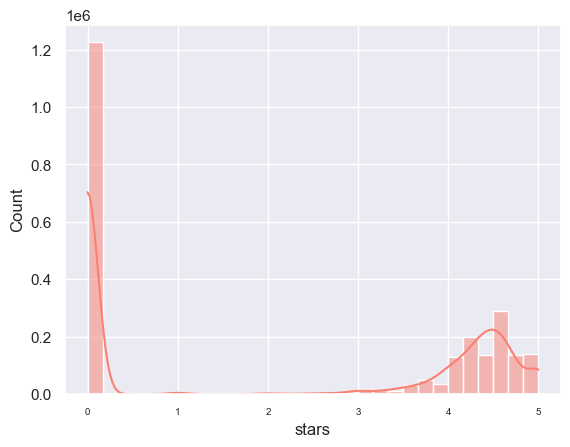

In [97]:
# Plotting stars histogram
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

<Axes: >

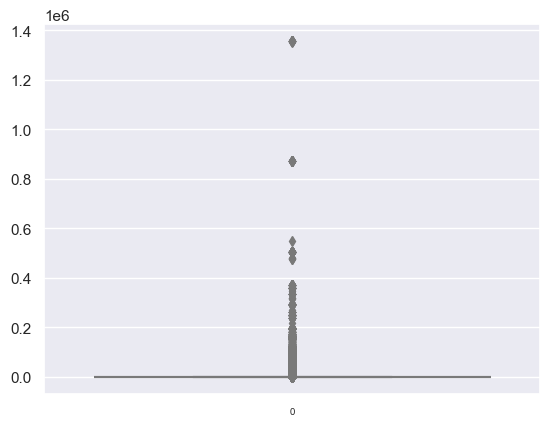

In [90]:
# Plotting a boxplot for the 'stars' column with a light blue color
sns.boxplot(data = df['stars'], color="lightblue")

Submission: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.